### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.

In [383]:
import matplotlib.pyplot as plt
import seaborn as sns

In [384]:
import pandas as pd

# Cargar el archivo Excel en un DataFrame de pandas
archivo_excel = 'BBDD_Hospitalización.xlsx'  # Reemplaza 'ruta_del_archivo.xlsx' con la ruta real de tu archivo
df = pd.read_excel(archivo_excel)

# Mostrar información básica sobre el DataFrame para verificar la estructura de las columnas
print(df.info())

# Guardar el DataFrame como un archivo CSV
archivo_csv = 'BBDD_Hospitalización.xlsx.csv'  # Reemplaza 'ruta_del_archivo.csv' con la ruta deseada para el archivo CSV
df.to_csv(archivo_csv, index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

c:\Users\nicol\anaconda3\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [385]:
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
567,59.0,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Revisión de la distribución estadística para el caso de las variables numéricas.

## Edad

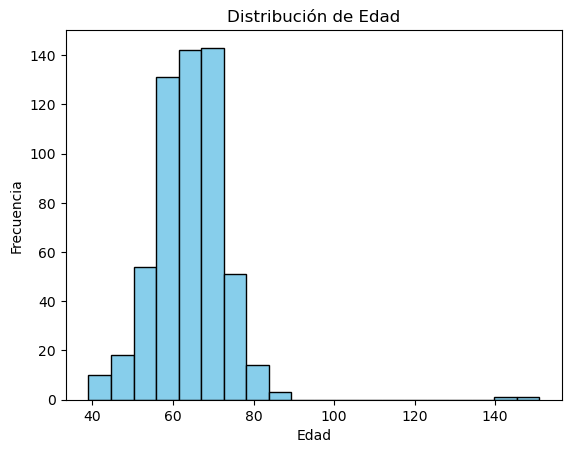

In [386]:
plt.hist(df['EDAD'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


En el gráfico podemos observar una concentración significativa entre las edades que van entre los 55 años y 70 años. Esto nos permite caracterizar la población de la muestra.

## PSA

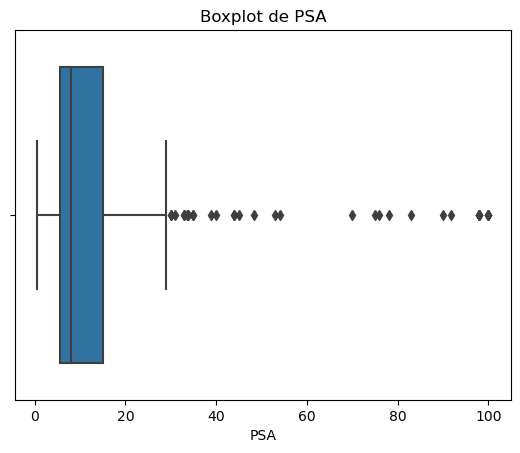

In [387]:
sns.boxplot(x=df['PSA'])
plt.title('Boxplot de PSA')
plt.show()


In [388]:
df['PSA'].describe()

count    564.000000
mean      13.271401
std       15.668966
min        0.600000
25%        5.600000
50%        8.000000
75%       15.000000
max      100.000000
Name: PSA, dtype: float64

En el gráfico boxplot de PSA podemos observar que hay una asimetría a la izquierda de la distribución, lo que implica que hay una concentración de valores hacia los valores más bajos de la muestra.

La presencia de puntos más allá del final del boxplot indica la presencia valores atípicos y outliers. 

## NUMERO DE MUESTRAS TOMADAS

In [389]:
df['NUMERO DE MUESTRAS TOMADAS'].describe()

count    568.000000
mean      12.996479
std        3.921180
min        4.000000
25%       12.000000
50%       12.000000
75%       12.000000
max       24.000000
Name: NUMERO DE MUESTRAS TOMADAS, dtype: float64

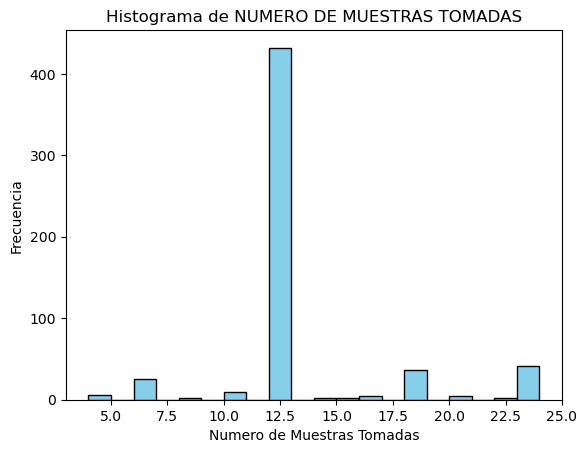

In [390]:
import matplotlib.pyplot as plt

# Crear un histograma para 'NUMERO DE MUESTRAS TOMADAS'
plt.hist(df['NUMERO DE MUESTRAS TOMADAS'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de NUMERO DE MUESTRAS TOMADAS')
plt.xlabel('Numero de Muestras Tomadas')
plt.ylabel('Frecuencia')
plt.show()


Al realizar el gráfico de boxplot, advertimos que no es el más óptimo para comprender la distribución de la columna, pues no nos otorga una información clara. Por ello, primero revisamos la columna NUMERO DE MUESTRAS TOMADAS con la función "describe" para entender la distribución de los datos. Luego realizamos un histograma.

Al revisar los resultados, podemos concluir que la variabilidad en el número de muestras tomadas es baja, y la cantidad de 12 es dominante en el conjunto de datos. Esto quiere decir, que en la mayoría de los casos, se tomaron 12 muestras a cada paciente. Esto podría deberse a protocolos de muestreo específicos, prácticas clínicas estandarizadas o restricciones en el proceso de toma de muestras.

## DIAS HOSPITALIZACION MQ

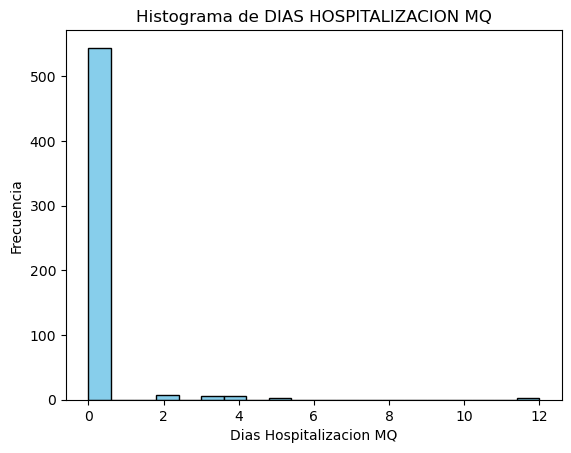

In [391]:
import matplotlib.pyplot as plt

# Crear un histograma para 'DIAS HOSPITALIZACION MQ'
plt.hist(df['DIAS HOSPITALIZACION MQ'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de DIAS HOSPITALIZACION MQ')
plt.xlabel('Dias Hospitalizacion MQ')
plt.ylabel('Frecuencia')
plt.show()


In [392]:
df['DIAS HOSPITALIZACION MQ'].describe()

count    568.000000
mean       0.165493
std        0.958066
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       12.000000
Name: DIAS HOSPITALIZACION MQ, dtype: float64

In [393]:
# Contar la frecuencia de cada valor único en la columna
frecuencia_diashosp_MQ = df['DIAS HOSPITALIZACION MQ'].value_counts()

# Mostrar el resultado
print(frecuencia_diashosp_MQ)


DIAS HOSPITALIZACION MQ
0.0     544
2.0       8
4.0       6
3.0       5
5.0       3
12.0      2
Name: count, dtype: int64


Al revisar la columna DIAS HOSPITALIZACION MQ, podemos observar que la mayoría de los datos de la muestra son cero. Esto quiere decir que tiene muy baja variabilidad y no aporta mucha información.

## DIAS HOSPITALIZACIÓN UPC

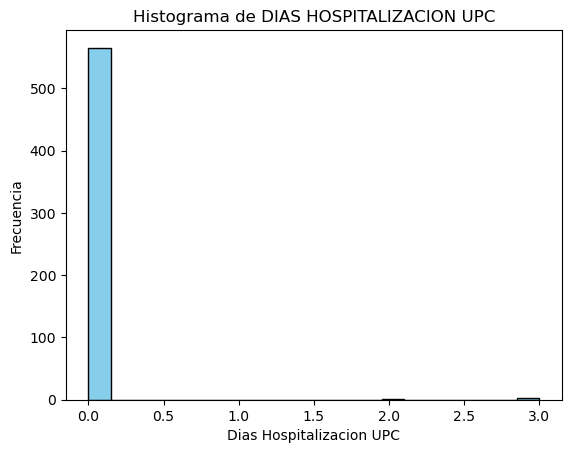

In [394]:
import matplotlib.pyplot as plt

# Crear un histograma para 'DIAS HOSPITALIZACION UPC'
plt.hist(df['DIAS HOSPITALIZACIÓN UPC'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de DIAS HOSPITALIZACION UPC')
plt.xlabel('Dias Hospitalizacion UPC')
plt.ylabel('Frecuencia')
plt.show()


In [395]:
df['DIAS HOSPITALIZACIÓN UPC'].describe()

count    568.000000
mean       0.014085
std        0.196474
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: DIAS HOSPITALIZACIÓN UPC, dtype: float64

In [396]:
# Contar la frecuencia de cada valor único en la columna
frecuencia_diashosp_UPC = df['DIAS HOSPITALIZACIÓN UPC'].value_counts()

# Mostrar el resultado
print(frecuencia_diashosp_UPC)

DIAS HOSPITALIZACIÓN UPC
0.0    565
3.0      2
2.0      1
Name: count, dtype: int64


Podemos observar que la mayoría de los valores son cero y hay poca variabilidad, por ello la columna puede no proporciona información significativa.

# Manejo de los valores atípicos.

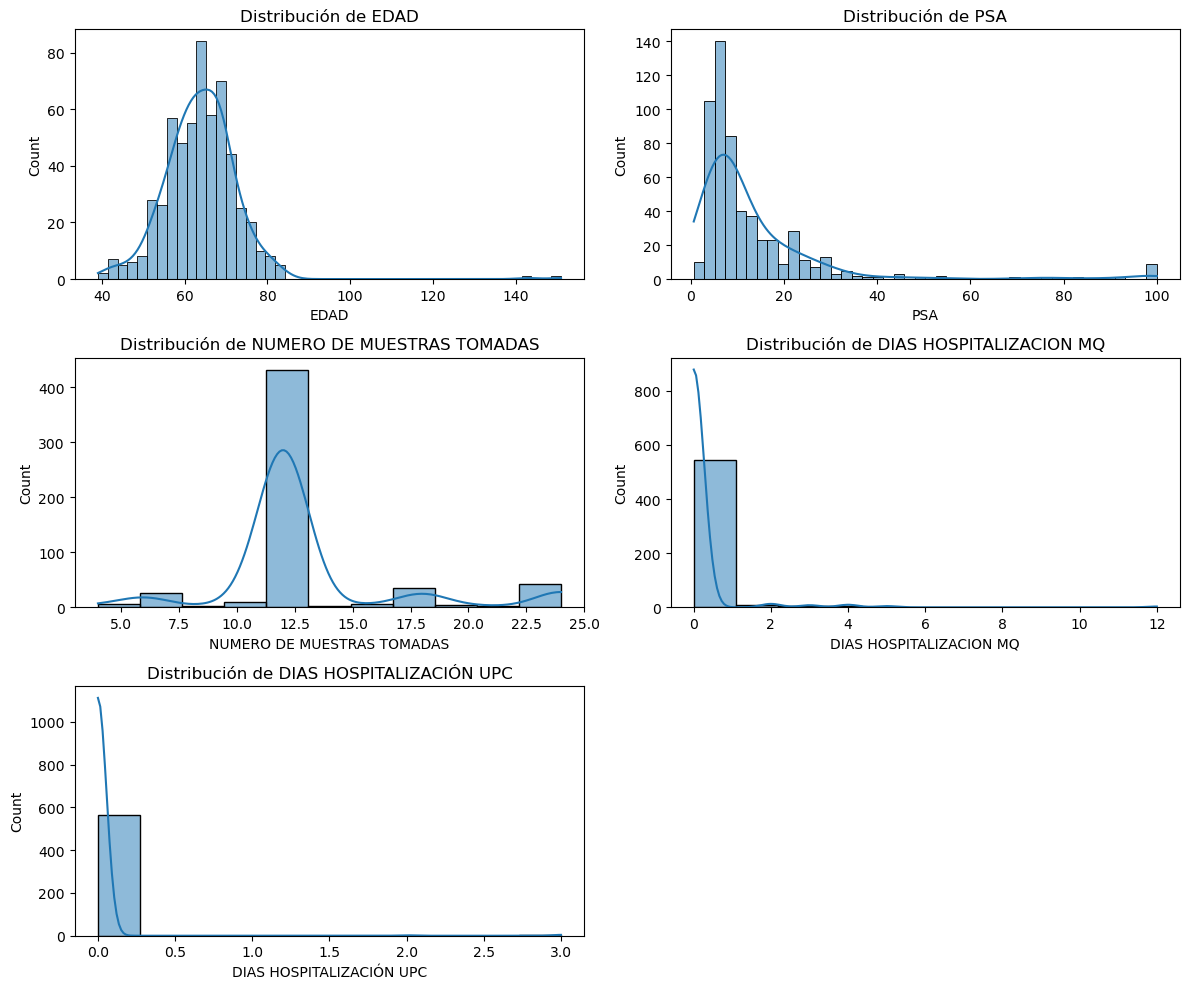

Nulos por columna:
EDAD                          2
PSA                           6
NUMERO DE MUESTRAS TOMADAS    2
DIAS HOSPITALIZACION MQ       2
DIAS HOSPITALIZACIÓN UPC      2
dtype: int64


In [397]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas de interés
columnas_interes = ['EDAD', 'PSA', 'NUMERO DE MUESTRAS TOMADAS', 'DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC']

# Visualizar la distribución de las variables
# Visualizar la distribución de las variables
plt.figure(figsize=(12, 10))
for i, columna in enumerate(columnas_interes, start=1):
    plt.subplot(3, 2, i)
    sns.histplot(df[columna], kde=True)
    plt.title(f'Distribución de {columna}')

plt.tight_layout()
plt.show()


# Mostrar la cantidad de nulos en cada columna
print("Nulos por columna:")
print(df[columnas_interes].isnull().sum())


Imputamos valores para los casos de outlieres en EDAD y PSA. En el primer caso, todos aquellos datos que estén sobre los 85 años se les imputa el valor de la tendencia central. En el caso de PSA también reemplazamos los valores atípicos con la media, pero en esta caso lo hacemos definiendo el umbral como el rango intercuartílico (IQR) y luego se imputa aquellos valores que estén sobre ese umbral.

In [398]:
# Calcular la mediana de la variable EDAD
mediana_edad = df['EDAD'].median()

# Reemplazar los valores atípicos mayores de 85 en la variable EDAD con la mediana
df['EDAD'] = df['EDAD'].apply(lambda x: mediana_edad if (pd.notna(x) and x > 85) else x)

In [399]:
# Calcular los cuartiles
cuartiles_psa = df['PSA'].quantile([0.25, 0.75])

# Definir el umbral como el rango intercuartílico (IQR)
iqr = cuartiles_psa[0.75] - cuartiles_psa[0.25]
umbral_superior = cuartiles_psa[0.75] + 1.5 * iqr

# Calcular la media de PSA
media_psa = df['PSA'].mean()

# Reemplazar los valores por encima del umbral y los nulos con la media
df['PSA'] = df['PSA'].apply(lambda x: media_psa if (pd.notna(x) and x > umbral_superior) else x)



Dado que son pocos nulos, en este caso es mejor imputarles la media. Eliminarlos puede no ser una buena idea considerando la baja variabilidad de las columnas.

In [400]:
# Lista de columnas a tratar
columnas_a_imputar = ['EDAD', 'PSA', 'NUMERO DE MUESTRAS TOMADAS', 'DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC']

# Iterar sobre las columnas y reemplazar nulos con la media
for columna in columnas_a_imputar:
    media_columna = df[columna].mean()
    df[columna] = df[columna].apply(lambda x: media_columna if pd.isna(x) else x)


# Visualización de variables categóricas.

## Variables del grupo "Mortalidad asociada al paciente": diabetes, hospitalización último mes, Cup, Enfermedad crónica pulmonar obstructiva, Volumen prostático.  

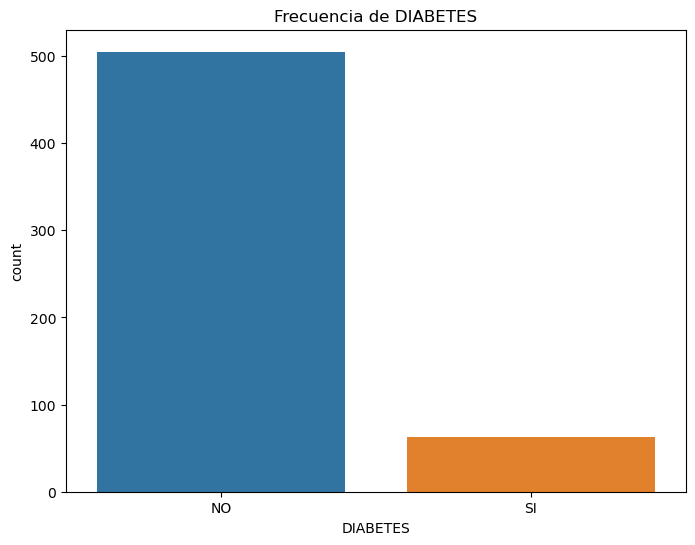

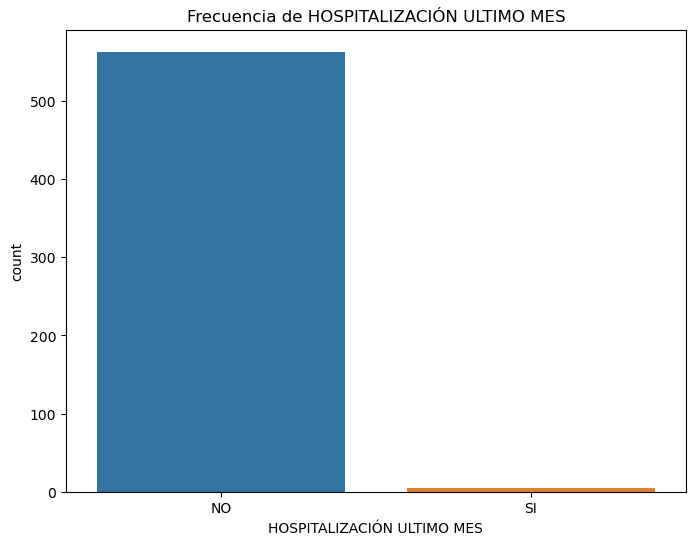

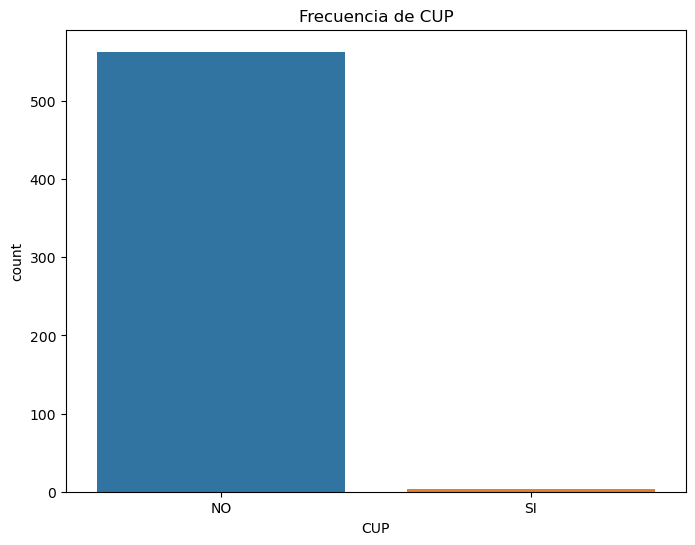

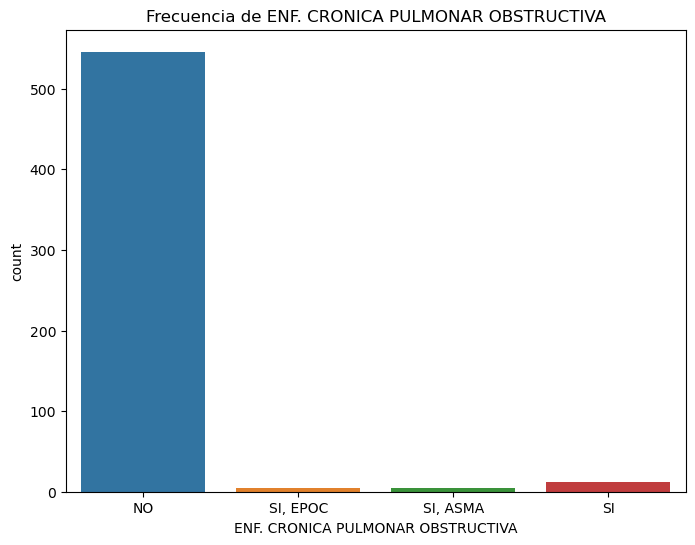

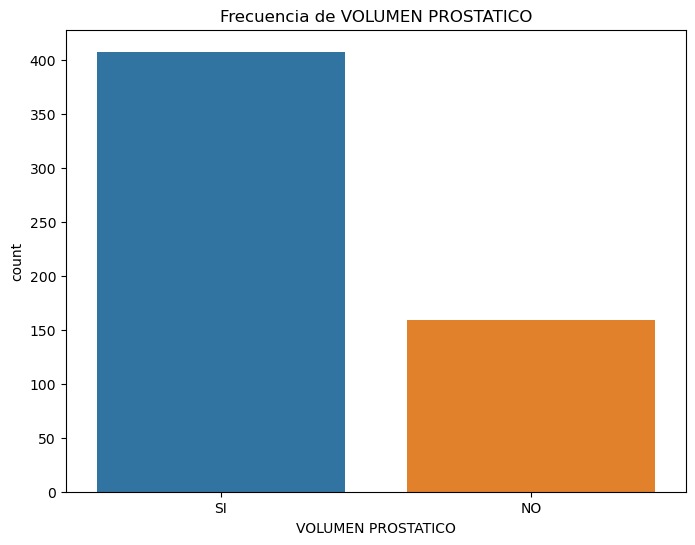

In [401]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables categóricas asociadas a la mortalidad del paciente
variables_mortalidad = ['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'VOLUMEN PROSTATICO']

# Iterar sobre las variables categóricas y crear gráficos de barras por separado
for variable in variables_mortalidad:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=variable, data=df)
    plt.title(f'Frecuencia de {variable}')
    plt.show()


In [402]:
# Lista de variables categóricas asociadas a la mortalidad del paciente
variables_mortalidad = ['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'VOLUMEN PROSTATICO']

# Iterar sobre las variables categóricas y mostrar estadísticas descriptivas
for variable in variables_mortalidad:
    print(f"\nEstadísticas descriptivas para {variable}:\n")
    print(df[variable].describe())
    print("=" * 40)



Estadísticas descriptivas para DIABETES:

count     568
unique      2
top        NO
freq      505
Name: DIABETES, dtype: object

Estadísticas descriptivas para HOSPITALIZACIÓN ULTIMO MES:

count     568
unique      2
top        NO
freq      563
Name: HOSPITALIZACIÓN ULTIMO MES, dtype: object

Estadísticas descriptivas para CUP:

count     567
unique      2
top        NO
freq      563
Name: CUP, dtype: object

Estadísticas descriptivas para ENF. CRONICA PULMONAR OBSTRUCTIVA:

count     566
unique      4
top        NO
freq      546
Name: ENF. CRONICA PULMONAR OBSTRUCTIVA, dtype: object

Estadísticas descriptivas para VOLUMEN PROSTATICO:

count     567
unique      2
top        SI
freq      408
Name: VOLUMEN PROSTATICO, dtype: object


## Variables del grupo "Antecedentes relacionados con la toma de la biopsia": Bolsas previas, Antibiótico utilizado en la profilaxis, biopsia.  

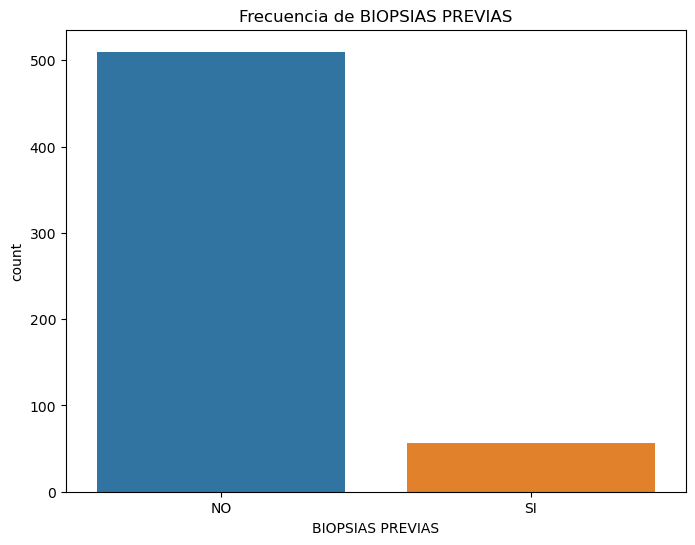

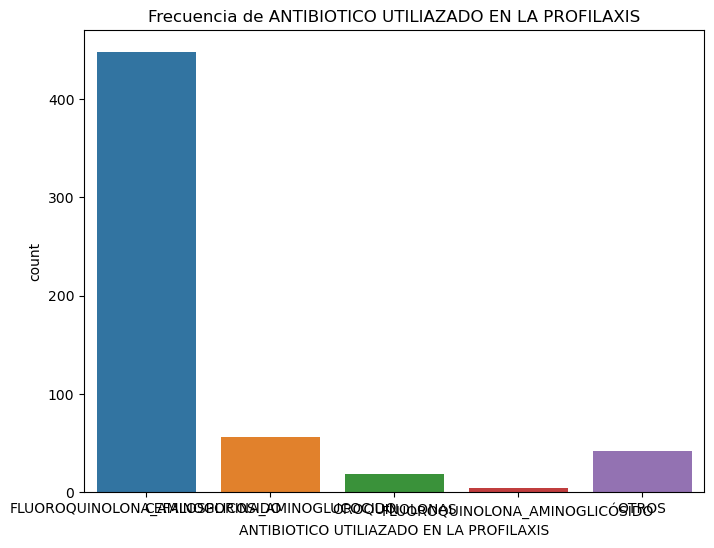

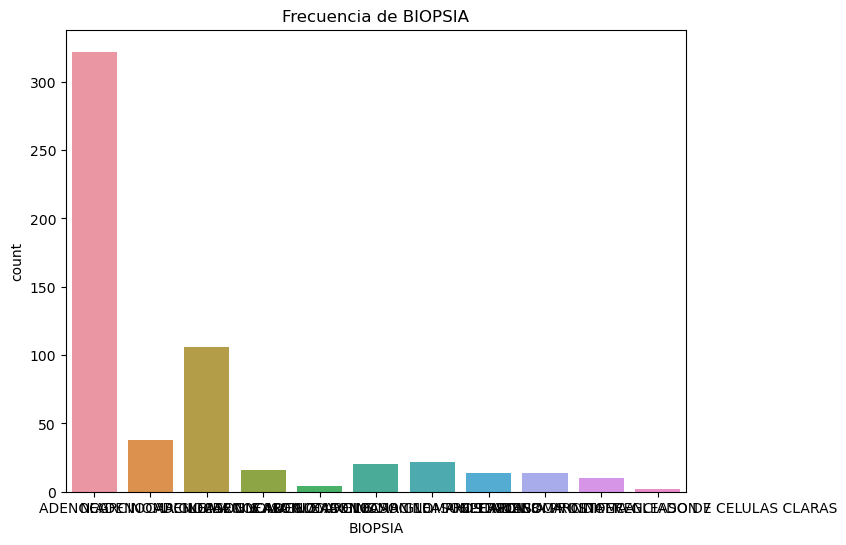

In [403]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables categóricas asociadas a la toma de biposias
variables_biopsia = ['BIOPSIAS PREVIAS', 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'BIOPSIA']

# Iterar sobre las variables categóricas y crear gráficos de barras por separado
for variable in variables_biopsia:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=variable, data=df)
    plt.title(f'Frecuencia de {variable}')
    plt.show()

In [404]:
# Lista de variables categóricas asociadas a toma de biopsias
variables_biopsia = ['BIOPSIAS PREVIAS', 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'BIOPSIA']

# Iterar sobre las variables categóricas y mostrar estadísticas descriptivas
for variable in variables_biopsia:
    print(f"\nEstadísticas descriptivas para {variable}:\n")
    print(df[variable].describe())
    print("=" * 40)


Estadísticas descriptivas para BIOPSIAS PREVIAS:

count     566
unique      2
top        NO
freq      510
Name: BIOPSIAS PREVIAS, dtype: object

Estadísticas descriptivas para ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS:

count                                568
unique                                 5
top       FLUOROQUINOLONA_AMINOGLICOSIDO
freq                                 448
Name: ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS, dtype: object

Estadísticas descriptivas para BIOPSIA:

count     568
unique     11
top       NEG
freq      322
Name: BIOPSIA, dtype: object


## Variables del grupo "Complicaciones infecciosas": Número de días Post biopsia en que se presenta la complicación infecciosa, fiebre, ITU, tipo de cultivo, Agente aislado, patrón de resistencia, hospitalización.

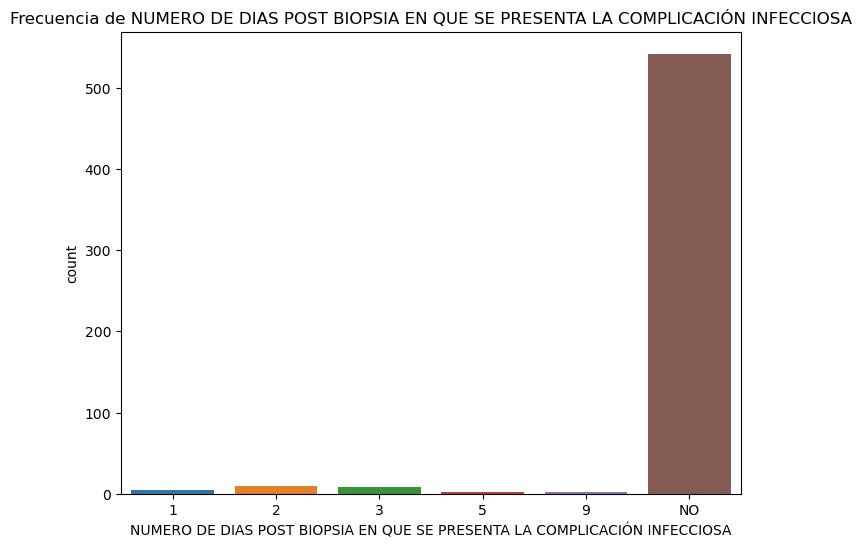

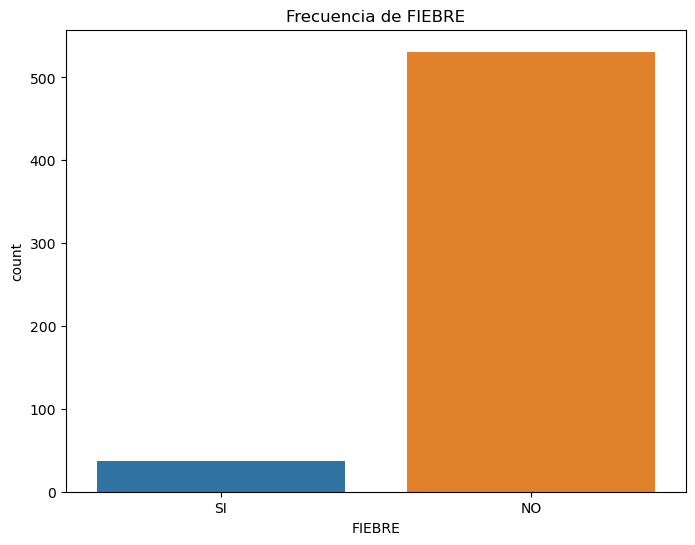

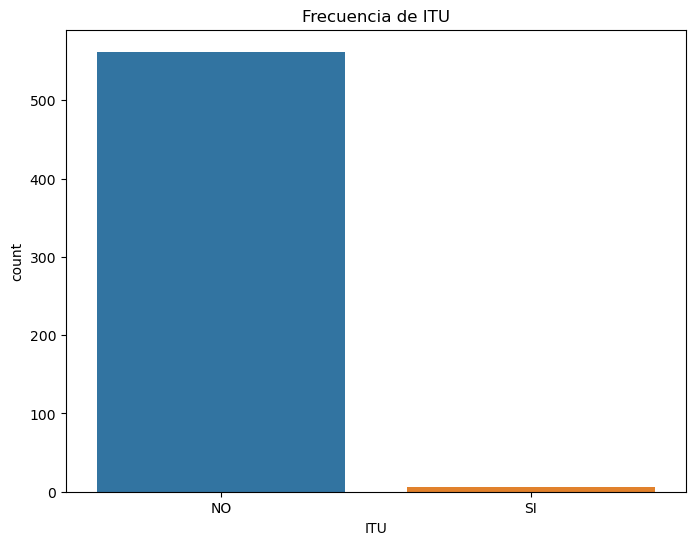

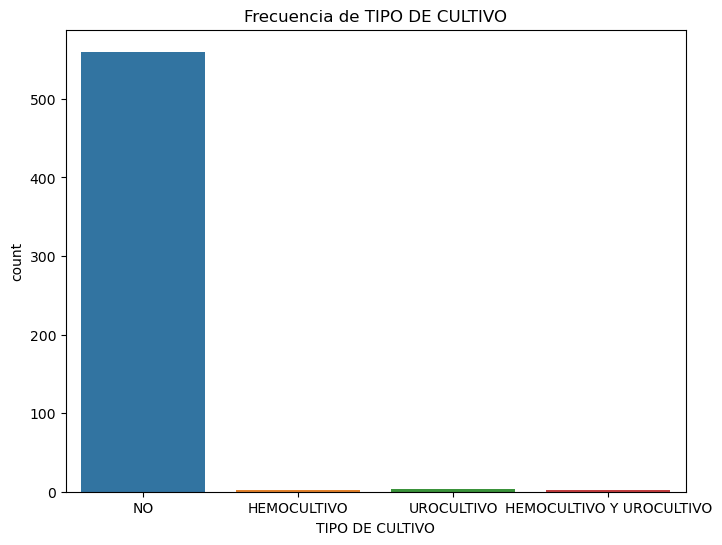

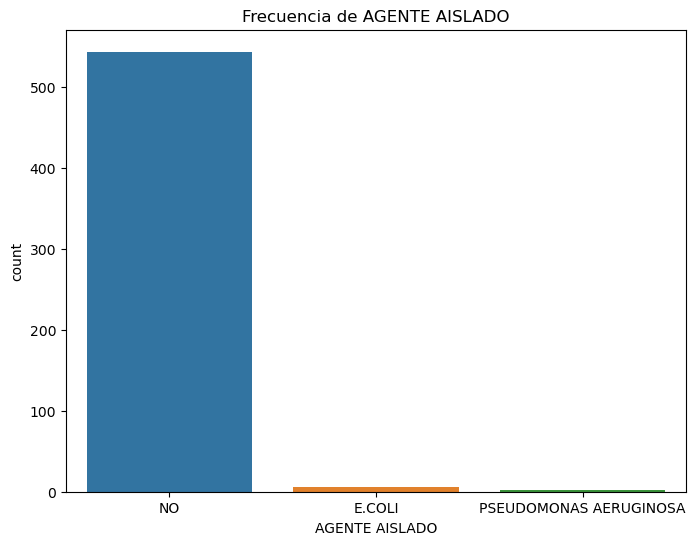

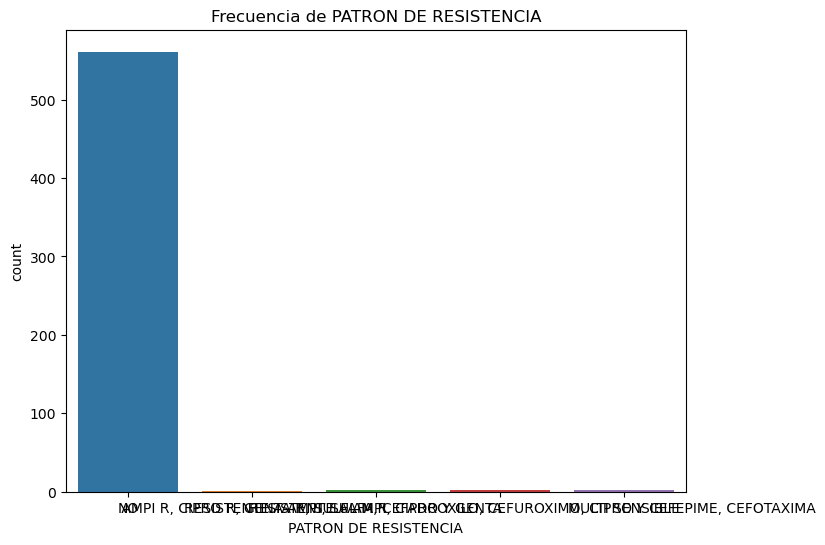

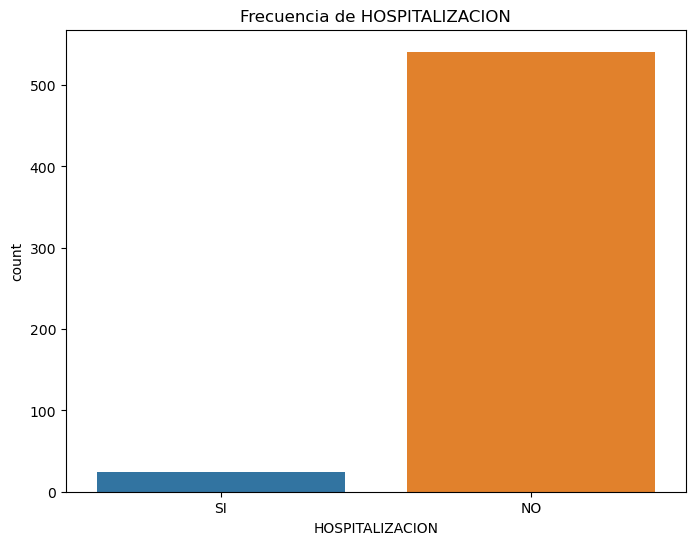

In [405]:
# Lista de variables categóricas asociadas a la toma de biposias
variables_complicaciones = ['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA', 'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA', 'HOSPITALIZACION']

# Iterar sobre las variables categóricas y crear gráficos de barras por separado
for variable in variables_complicaciones:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=variable, data=df)
    plt.title(f'Frecuencia de {variable}')
    plt.show()

In [406]:
# Lista de variables categóricas asociadas a toma de biopsias
variables_complicaciones = ['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA', 'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA', 'HOSPITALIZACION']

# Iterar sobre las variables categóricas y mostrar estadísticas descriptivas
for variable in variables_complicaciones:
    print(f"\nEstadísticas descriptivas para {variable}:\n")
    print(df[variable].describe())
    print("=" * 40)


Estadísticas descriptivas para NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA:

count     568
unique      6
top        NO
freq      542
Name: NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA, dtype: object

Estadísticas descriptivas para FIEBRE:

count     568
unique      2
top        NO
freq      531
Name: FIEBRE, dtype: object

Estadísticas descriptivas para ITU:

count     568
unique      2
top        NO
freq      562
Name: ITU, dtype: object

Estadísticas descriptivas para TIPO DE CULTIVO:

count     568
unique      4
top        NO
freq      560
Name: TIPO DE CULTIVO, dtype: object

Estadísticas descriptivas para AGENTE AISLADO:

count     551
unique      3
top        NO
freq      543
Name: AGENTE AISLADO, dtype: object

Estadísticas descriptivas para PATRON DE RESISTENCIA:

count     568
unique      5
top        NO
freq      561
Name: PATRON DE RESISTENCIA, dtype: object

Estadísticas descriptivas para HOSPITALIZACION:

count   

# Manejo de valores nulos 

In [407]:
# Lista de columnas a verificar
columnas_a_verificar = ['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA',
                         'VOLUMEN PROSTATICO', 'BIOPSIAS PREVIAS', 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS',
                         'BIOPSIA', 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
                         'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA', 'HOSPITALIZACION']

# Mostrar la cantidad de nulos en cada columna
print("Nulos por columna:")
print(df[columnas_a_verificar].isnull().sum())


Nulos por columna:
DIABETES                                                                      2
HOSPITALIZACIÓN ULTIMO MES                                                    2
CUP                                                                           3
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             4
VOLUMEN PROSTATICO                                                            3
BIOPSIAS PREVIAS                                                              4
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       2
BIOPSIA                                                                       2
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     2
FIEBRE                                                                        2
ITU                                                                           2
TIPO DE CULTIVO                                                               2
AGENTE AISLADO       

Convertimos los valores de las columnas a ceros y unos. Comenzamos por las columnas que no son categóricas. Combinamos columnas con pocos datos y también le agregamos los nulos. 

In [408]:

df['BIOPSIA'] = df['BIOPSIA'].apply(lambda x: 0 if x == 'NEG' or pd.isna(x) else 1)

# Muestra el resultado
print(df['BIOPSIA'].value_counts())



BIOPSIA
0    324
1    246
Name: count, dtype: int64


In [409]:
# Reemplaza 'ENF. CRONICA PULMONAR OBSTRUCTIVA' con el nombre real de tu columna
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].apply(lambda x: 1 if pd.notna(x) and 'SI' in str(x) else 0)

# Muestra el resultado
print(df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].value_counts())


ENF. CRONICA PULMONAR OBSTRUCTIVA
0    550
1     20
Name: count, dtype: int64


In [410]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Crear una copia de la columna
columna_antibiotico = df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].copy()

# Crear una instancia de SimpleImputer con estrategia 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Imputar los nulos en la columna
columna_antibiotico_imputada = imputer.fit_transform(columna_antibiotico.values.reshape(-1, 1))

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar la transformación a la columna imputada
columna_antibiotico_imputada = label_encoder.fit_transform(columna_antibiotico_imputada)

# Asignar los resultados al DataFrame
df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'] = columna_antibiotico_imputada

# Mostrar los primeros registros del DataFrame después de la transformación
print(df.head())



   EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES   PSA BIOPSIAS PREVIAS  \
0  53.0       NO                         NO   4.0               NO   
1  56.0       NO                         NO   7.7               NO   
2  57.0       NO                         NO  29.0               SI   
3  56.0       NO                         NO   7.0               NO   
4  55.0       NO                         NO  29.0               SI   

  VOLUMEN PROSTATICO  ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
0                 SI                                        1   
1                 SI                                        1   
2                 SI                                        1   
3                 SI                                        1   
4                 SI                                        1   

   NUMERO DE MUESTRAS TOMADAS CUP  ENF. CRONICA PULMONAR OBSTRUCTIVA  BIOPSIA  \
0                        12.0  NO                                  0        0   
1                        1

c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [411]:
# Imputar los nulos y cambiar todos los valores a una categoría (por ejemplo, 'N/A')
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].fillna('N/A', inplace=True)

# Convertir 'NO' a 0 y cualquier otro valor (incluidos los nulos) a 1
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].apply(lambda x: 0 if x == 'NO' else 1)

# Imprimir los primeros registros del DataFrame para verificar los cambios
print(df.head())


   EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES   PSA BIOPSIAS PREVIAS  \
0  53.0       NO                         NO   4.0               NO   
1  56.0       NO                         NO   7.7               NO   
2  57.0       NO                         NO  29.0               SI   
3  56.0       NO                         NO   7.0               NO   
4  55.0       NO                         NO  29.0               SI   

  VOLUMEN PROSTATICO  ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
0                 SI                                        1   
1                 SI                                        1   
2                 SI                                        1   
3                 SI                                        1   
4                 SI                                        1   

   NUMERO DE MUESTRAS TOMADAS CUP  ENF. CRONICA PULMONAR OBSTRUCTIVA  BIOPSIA  \
0                        12.0  NO                                  0        0   
1                        1

In [412]:
# Imputar los nulos y cambiar todos los valores a una categoría (por ejemplo, 'N/A')
df['TIPO DE CULTIVO'].fillna('N/A', inplace=True)

# Convertir 'NO' a 0 y cualquier otro valor (incluidos los nulos) a 1
df['TIPO DE CULTIVO'] = df['TIPO DE CULTIVO'].apply(lambda x: 0 if x == 'NO' else 1)

# Imprimir los primeros registros del DataFrame para verificar los cambios
print(df.head())


   EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES   PSA BIOPSIAS PREVIAS  \
0  53.0       NO                         NO   4.0               NO   
1  56.0       NO                         NO   7.7               NO   
2  57.0       NO                         NO  29.0               SI   
3  56.0       NO                         NO   7.0               NO   
4  55.0       NO                         NO  29.0               SI   

  VOLUMEN PROSTATICO  ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
0                 SI                                        1   
1                 SI                                        1   
2                 SI                                        1   
3                 SI                                        1   
4                 SI                                        1   

   NUMERO DE MUESTRAS TOMADAS CUP  ENF. CRONICA PULMONAR OBSTRUCTIVA  BIOPSIA  \
0                        12.0  NO                                  0        0   
1                        1

In [413]:

# Reemplazar 'NO' con 0, 'E.COLI' y 'PSEUDOMONAS AERUGINOSA' con 1, y los nulos con 2
df['AGENTE AISLADO'] = df['AGENTE AISLADO'].map({'NO': 0, 'E.COLI': 1, 'PSEUDOMONAS AERUGINOSA': 1}).fillna(2)

# Imprimir los resultados
print(df['AGENTE AISLADO'].value_counts())


AGENTE AISLADO
0.0    543
2.0     19
1.0      8
Name: count, dtype: int64


In [414]:
# Importar las bibliotecas necesarias
from sklearn.impute import SimpleImputer

# Reemplazar 'NO' con 0 y todo lo demás (incluidos los nulos) con 1
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].apply(lambda x: 0 if x == 'NO' else 1)

# Imputar los nulos en la columna 'PATRON DE RESISTENCIA'
imputer = SimpleImputer(strategy='most_frequent')
df['PATRON DE RESISTENCIA'] = imputer.fit_transform(df[['PATRON DE RESISTENCIA']])


Ahora tomamos nuestras variables no numericas y las convertimos en ceros y unos. Los nulos siempre van a la variable minoritaria, que por lo general es 1, salvo en VOLUMEN PROSTATICO.

In [415]:
columns_to_check = ['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'CUP', 'VOLUMEN PROSTATICO', 'BIOPSIAS PREVIAS', 'FIEBRE', 'ITU', 'HOSPITALIZACION']

for column in columns_to_check:
    print(f"{column}:\n{df[column].value_counts(dropna=False)}\nNulos: {df[column].isnull().sum()}\n{'='*50}\n")


DIABETES:
DIABETES
NO     505
SI      63
NaN      2
Name: count, dtype: int64
Nulos: 2

HOSPITALIZACIÓN ULTIMO MES:
HOSPITALIZACIÓN ULTIMO MES
NO     563
SI       5
NaN      2
Name: count, dtype: int64
Nulos: 2

CUP:
CUP
NO     563
SI       4
NaN      3
Name: count, dtype: int64
Nulos: 3

VOLUMEN PROSTATICO:
VOLUMEN PROSTATICO
SI     408
NO     159
NaN      3
Name: count, dtype: int64
Nulos: 3

BIOPSIAS PREVIAS:
BIOPSIAS PREVIAS
NO     510
SI      56
NaN      4
Name: count, dtype: int64
Nulos: 4

FIEBRE:
FIEBRE
NO     531
SI      37
NaN      2
Name: count, dtype: int64
Nulos: 2

ITU:
ITU
NO     562
SI       6
NaN      2
Name: count, dtype: int64
Nulos: 2

HOSPITALIZACION:
HOSPITALIZACION
NO     541
SI      24
NaN      5
Name: count, dtype: int64
Nulos: 5



In [416]:
import numpy as np

# Lista de columnas a procesar
columns_to_process = ['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'CUP', 'BIOPSIAS PREVIAS', 'FIEBRE', 'ITU', 'HOSPITALIZACION']

# Diccionario para mapear valores
mapping_dict = {'NO': 0, 'SI': 1, np.nan: 1}

# Procesar cada columna
for column in columns_to_process:
    # Mapear los valores según el diccionario
    df[column] = df[column].map(mapping_dict)
    
    # Imprimir resultados
    print(f"{column}:\n{df[column].value_counts(dropna=False)}\nNulos: {df[column].isnull().sum()}\n{'='*50}\n")


DIABETES:
DIABETES
0    505
1     65
Name: count, dtype: int64
Nulos: 0

HOSPITALIZACIÓN ULTIMO MES:
HOSPITALIZACIÓN ULTIMO MES
0    563
1      7
Name: count, dtype: int64
Nulos: 0

CUP:
CUP
0    563
1      7
Name: count, dtype: int64
Nulos: 0

BIOPSIAS PREVIAS:
BIOPSIAS PREVIAS
0    510
1     60
Name: count, dtype: int64
Nulos: 0

FIEBRE:
FIEBRE
0    531
1     39
Name: count, dtype: int64
Nulos: 0

ITU:
ITU
0    562
1      8
Name: count, dtype: int64
Nulos: 0

HOSPITALIZACION:
HOSPITALIZACION
0    541
1     29
Name: count, dtype: int64
Nulos: 0



In [417]:

df['VOLUMEN PROSTATICO'] = df['VOLUMEN PROSTATICO'].apply(lambda x: 1 if pd.notna(x) and x == 'SI' else 0)

# Muestra el resultado
print(df['VOLUMEN PROSTATICO'].value_counts())
print("Nulos:", df['VOLUMEN PROSTATICO'].isnull().sum())


VOLUMEN PROSTATICO
1    408
0    162
Name: count, dtype: int64
Nulos: 0


In [418]:
# Mostrar la cantidad de valores nulos por columna
print(df.isnull().sum())


EDAD                                                                         0
DIABETES                                                                     0
HOSPITALIZACIÓN ULTIMO MES                                                   0
PSA                                                                          0
BIOPSIAS PREVIAS                                                             0
VOLUMEN PROSTATICO                                                           0
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                      0
NUMERO DE MUESTRAS TOMADAS                                                   0
CUP                                                                          0
ENF. CRONICA PULMONAR OBSTRUCTIVA                                            0
BIOPSIA                                                                      0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA    0
FIEBRE                                              

# Revisión de las variables numéricas

Dado que observamos estas diferencias en las escalas y distribuciones, es posible que beneficiaría normalizar algunas variables antes de usarlas en modelos que son sensibles a estas diferencias.Las variables tienen diferentes rangos de valores, lo que puede afectar la eficacia de algunos algoritmos. Por ejemplo, 'PSA' tiene un rango de 0.6 a 29, mientras que 'DIAS HOSPITALIZACION MQ' tiene un rango de 0 a 12. Adicionalmente, las desviaciones estándar también varían, lo que indica que las escalas de las variables son diferentes. 

Dejamos fuera EDAD.

In [419]:
from sklearn.preprocessing import StandardScaler

# Selecciona las columnas a normalizar
columnas_a_normalizar = ['PSA', 'NUMERO DE MUESTRAS TOMADAS', 'DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC']

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Normaliza las columnas seleccionadas
df[columnas_a_normalizar] = scaler.fit_transform(df[columnas_a_normalizar])


# Realizamos una matriz de correlación con el fin de determinar si hay variables redundantes. 

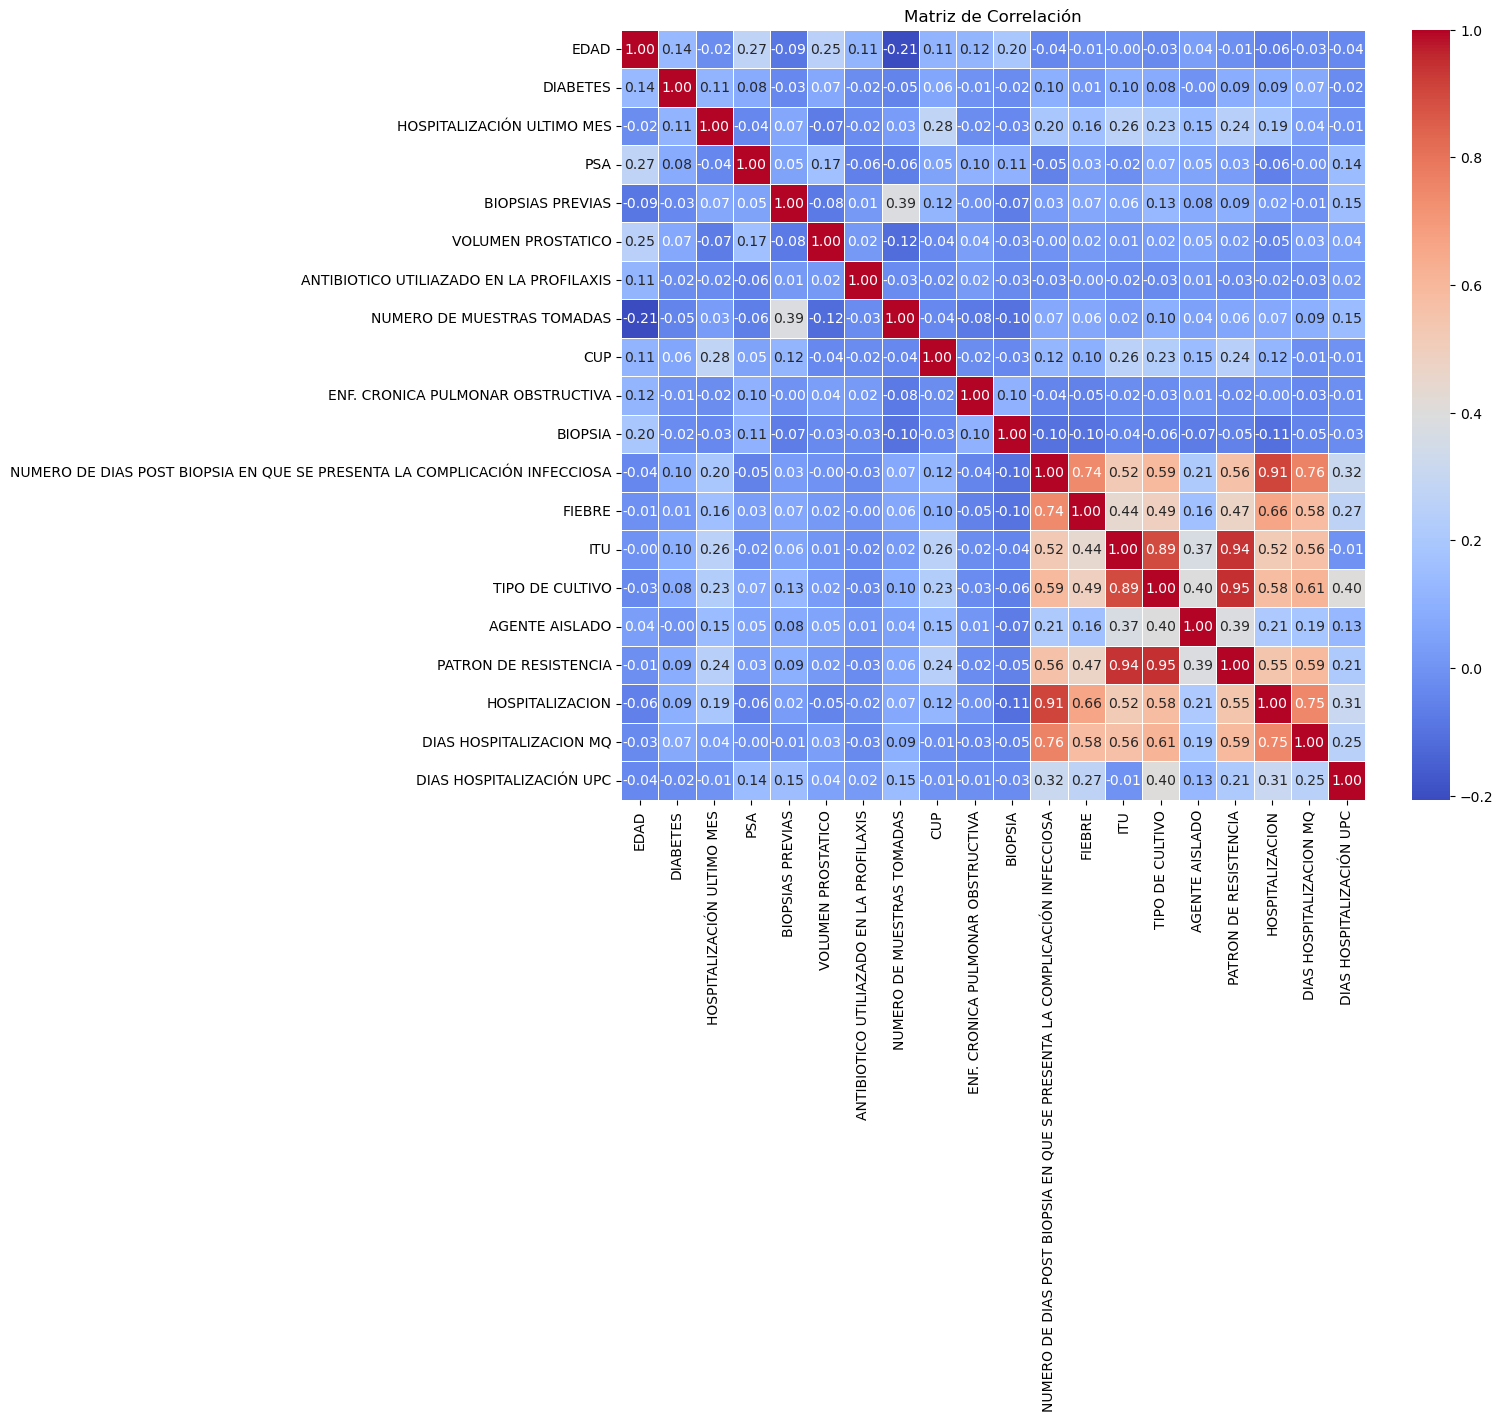

In [420]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()



In [421]:
# Filtrar las variables con correlación mayor a 0.5 o menor a -0.5
high_corr_variables = correlation_matrix[abs(correlation_matrix) > 0.5]
high_corr_variables = high_corr_variables[high_corr_variables < 1].stack().reset_index()
high_corr_variables.columns = ['Variable 1', 'Variable 2', 'Correlación']

# Mostrar las variables con alta correlación
print("Variables con correlación mayor a 0.5 o menor a -0.5:")
print(high_corr_variables)


Variables con correlación mayor a 0.5 o menor a -0.5:
                                           Variable 1  \
0   NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA...   
1   NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA...   
2   NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA...   
3   NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA...   
4   NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA...   
5   NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA...   
6                                              FIEBRE   
7                                              FIEBRE   
8                                              FIEBRE   
9                                                 ITU   
10                                                ITU   
11                                                ITU   
12                                                ITU   
13                                                ITU   
14                                    TIPO DE CULTIVO   
15                                

Eliminamos las variables altamente correlacionadas

In [422]:
# Lista de variables altamente correlacionadas
variables_correlacionadas = [
    'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
    'DIAS HOSPITALIZACION MQ',
    'ITU',
    'TIPO DE CULTIVO',
    'PATRON DE RESISTENCIA'
]

# Eliminar las variables altamente correlacionadas del DataFrame
df = df.drop(variables_correlacionadas, axis=1)




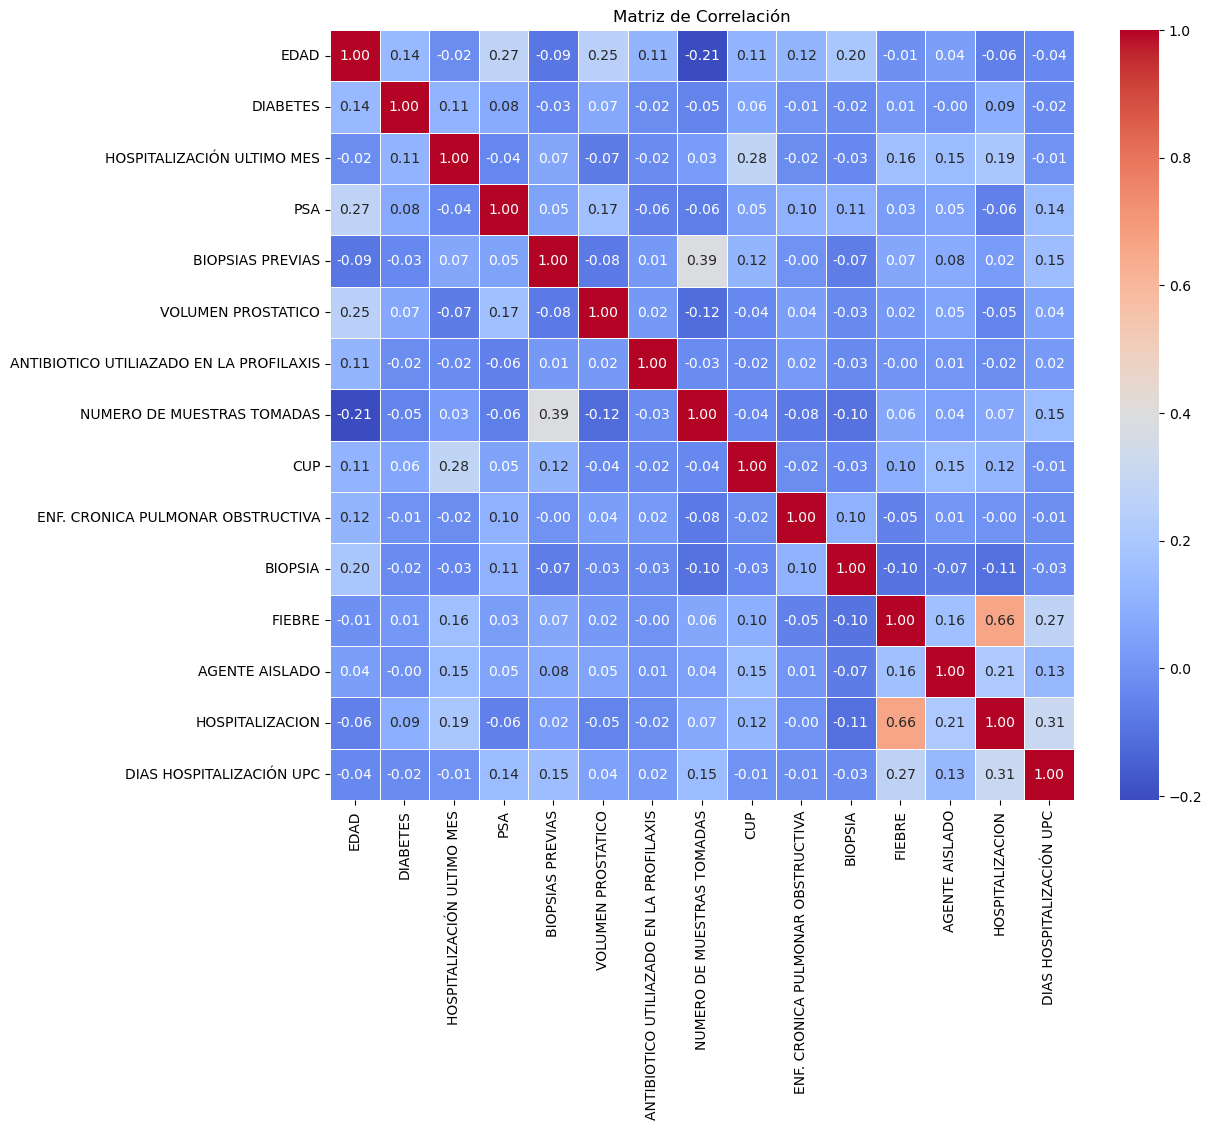

In [423]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


In [424]:
# Filtrar las variables con correlación mayor a 0.5 o menor a -0.5
high_corr_variables = correlation_matrix[abs(correlation_matrix) > 0.5]
high_corr_variables = high_corr_variables[high_corr_variables < 1].stack().reset_index()
high_corr_variables.columns = ['Variable 1', 'Variable 2', 'Correlación']

# Mostrar las variables con alta correlación
print("Variables con correlación mayor a 0.5 o menor a -0.5:")
print(high_corr_variables)


Variables con correlación mayor a 0.5 o menor a -0.5:
        Variable 1       Variable 2  Correlación
0           FIEBRE  HOSPITALIZACION     0.664574
1  HOSPITALIZACION           FIEBRE     0.664574


# Exportamos la base de datos preparada en un archivo .csv para el modelamiento. 

In [425]:
# Convierte el df en un archivo csv llamado df_preparado.csv
df.to_csv('df_preparado.csv', index=False)